In [3]:
import numpy as np
import pandas as pd
# Affichage complet des dataframes
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

# Librairie graphique plotly
import plotly.graph_objs as go

In [4]:
df=pd.read_csv("./dev/machineLearning/bigData/TP3/data/fifa22.csv")
df.head(3)

/tmp/ipykernel_4709/3801219230.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./dev/machineLearning/bigData/TP3/data/fifa22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [5]:
attaquants=['CF', 'ST', 'LW', 'LF', 'RF','RW','RS','LS']
milieux=['LM','CAM','CDM','CM','RM','RCM','RDM','LCM','LDM','RAM']
defenseurs=['LWB','LB','CB','RB','RWB','LCB','RCB']
gardiens=['GK']

def pos2(position):
    if position in attaquants:
        return 'Attaquant'
    elif position in milieux:
        return 'Milieu'
    elif position in defenseurs:
        return 'Défenseur'
    elif position in gardiens:
        return 'Gardien'
    else:
        return 'Remplaçant'


df["Position2"]=df["club_position"].apply(lambda x: pos2(x))
df["Position2"].value_counts()

Remplaçant    11549
Défenseur      2850
Milieu         2770
Attaquant      1369
Gardien         701
Name: Position2, dtype: int64

In [6]:
skills_ratings = ['pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing',
                  'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
                  'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed',
                  'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
                  'power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
                  'mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle',
                  'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
                  'goalkeeping_reflexes','goalkeeping_speed']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_4709/3581247700.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['cluster'] = labels
/tmp/ipykernel_4709/3581247700.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['pca1'] = transformed[:, 0]
/tmp/ipykernel_4709/3581247700.py:36: SettingWithCop

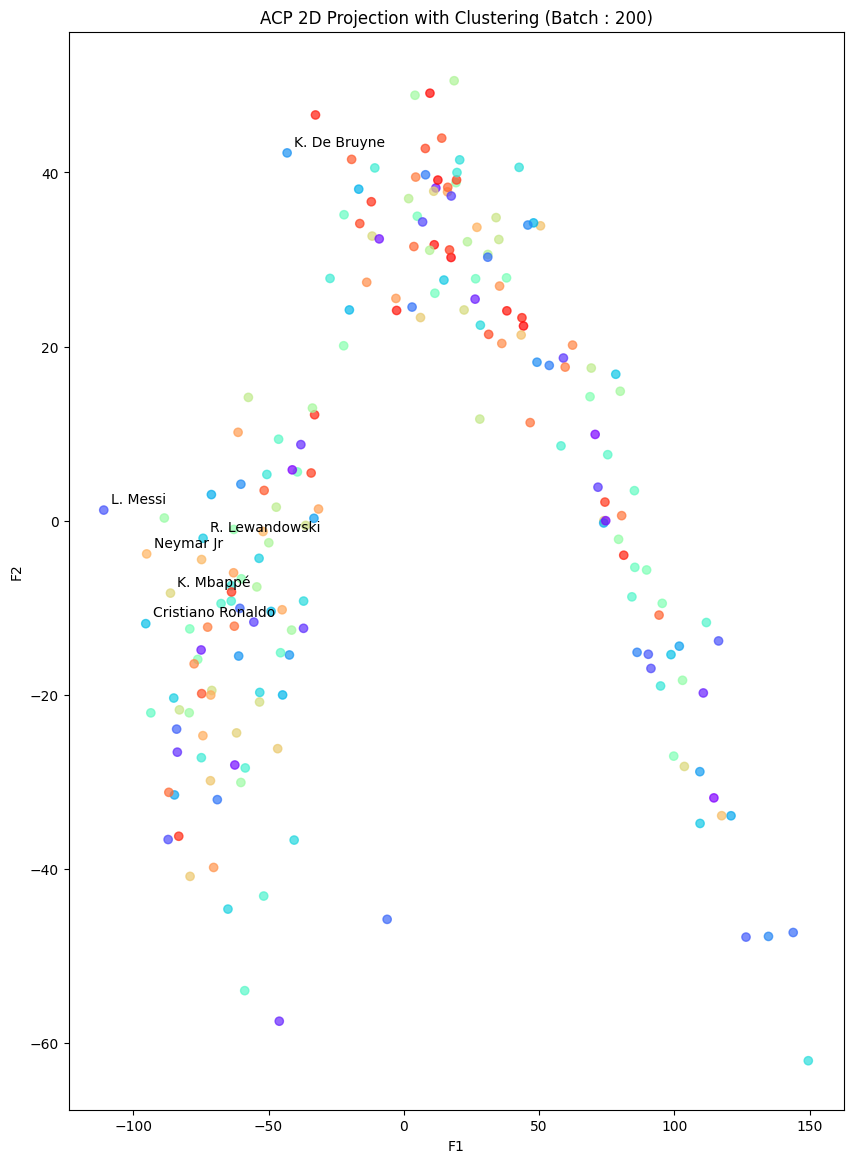

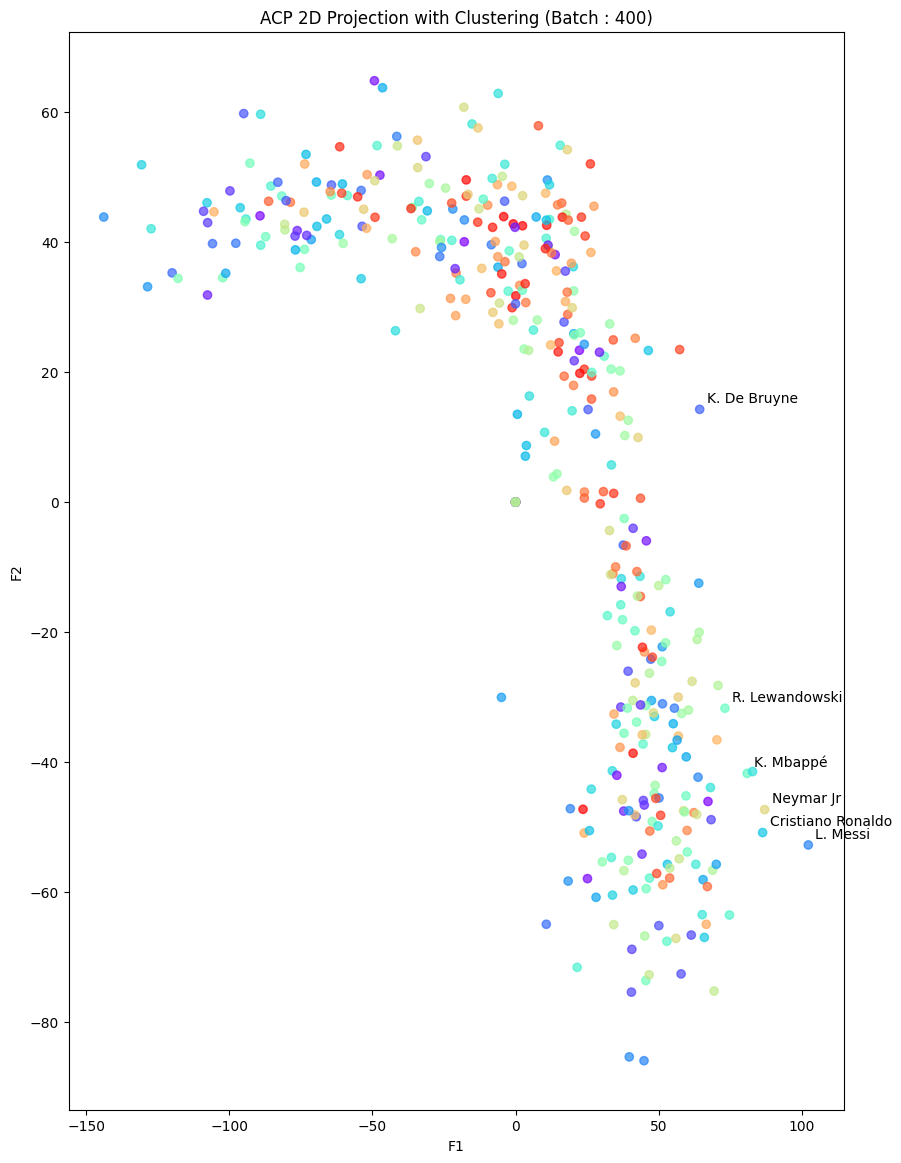

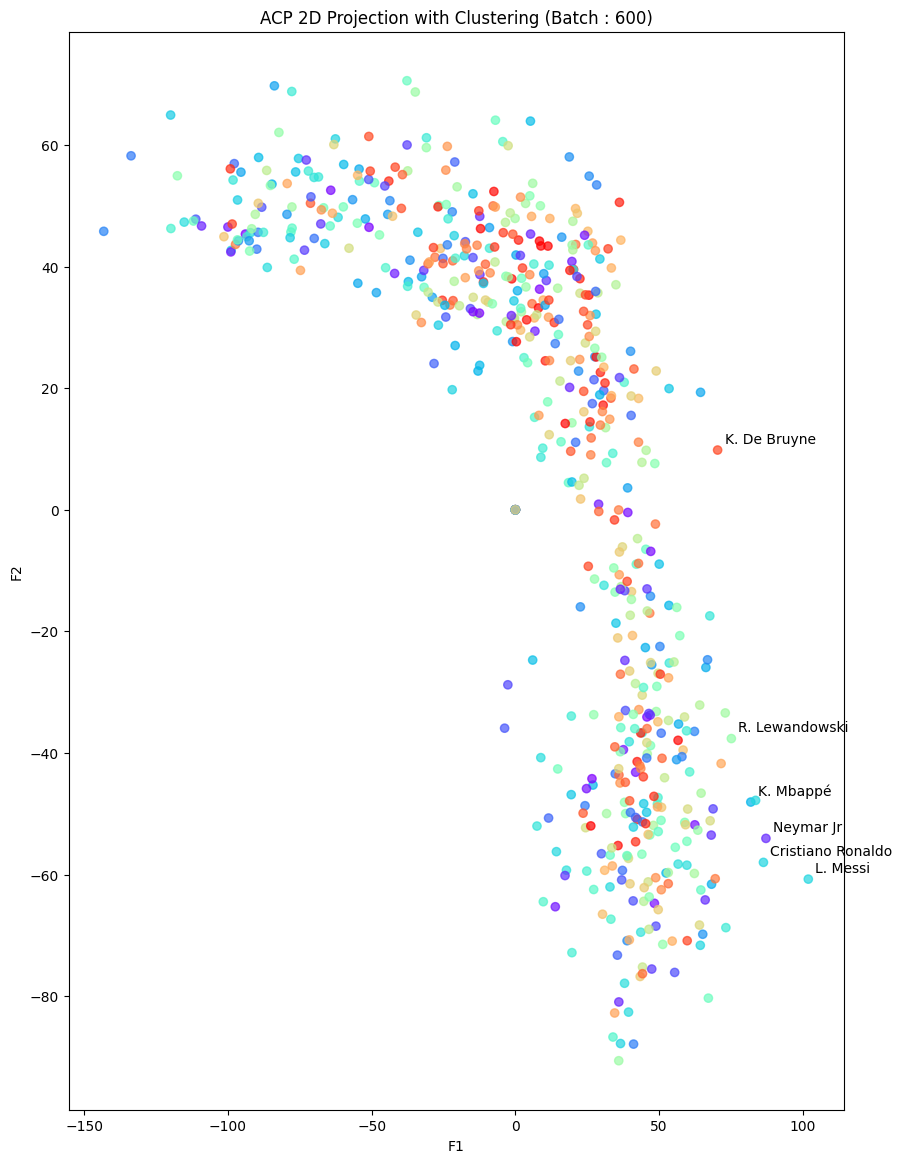

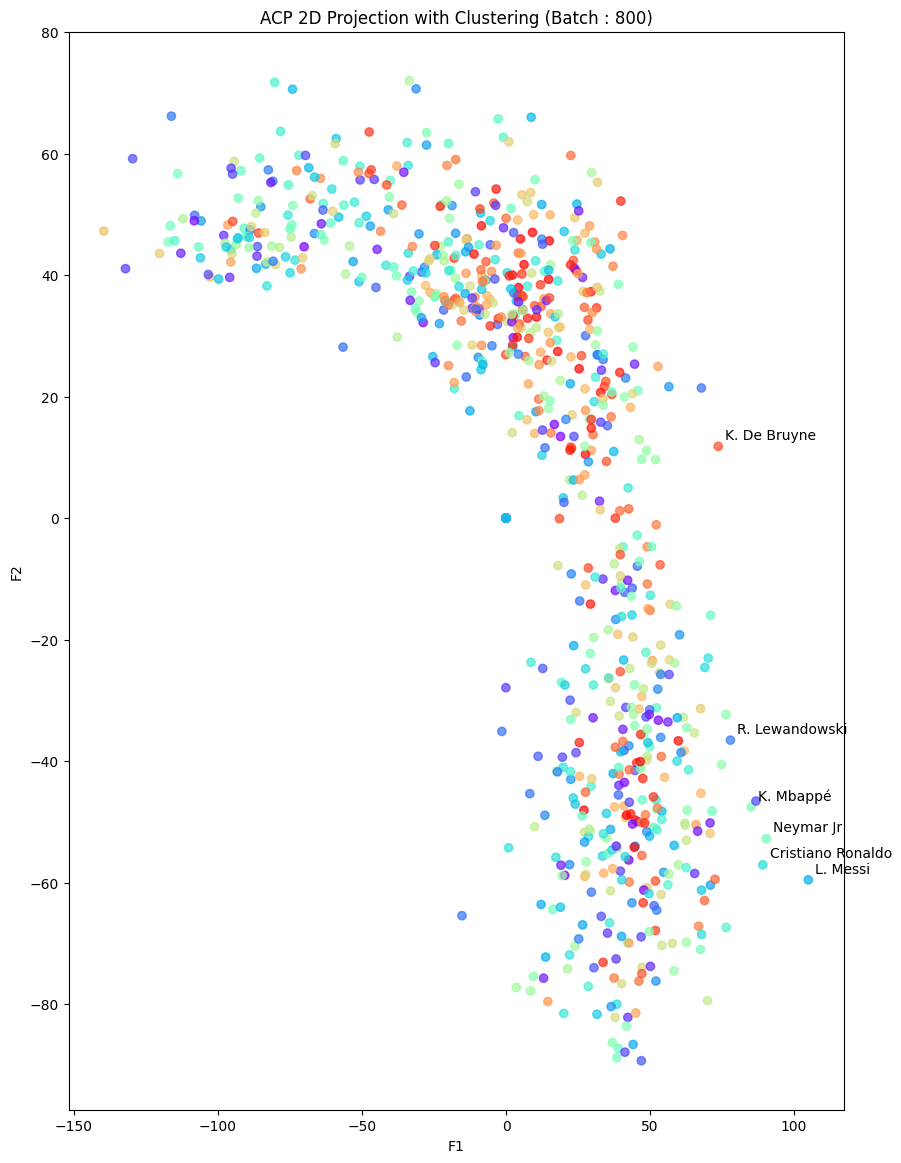

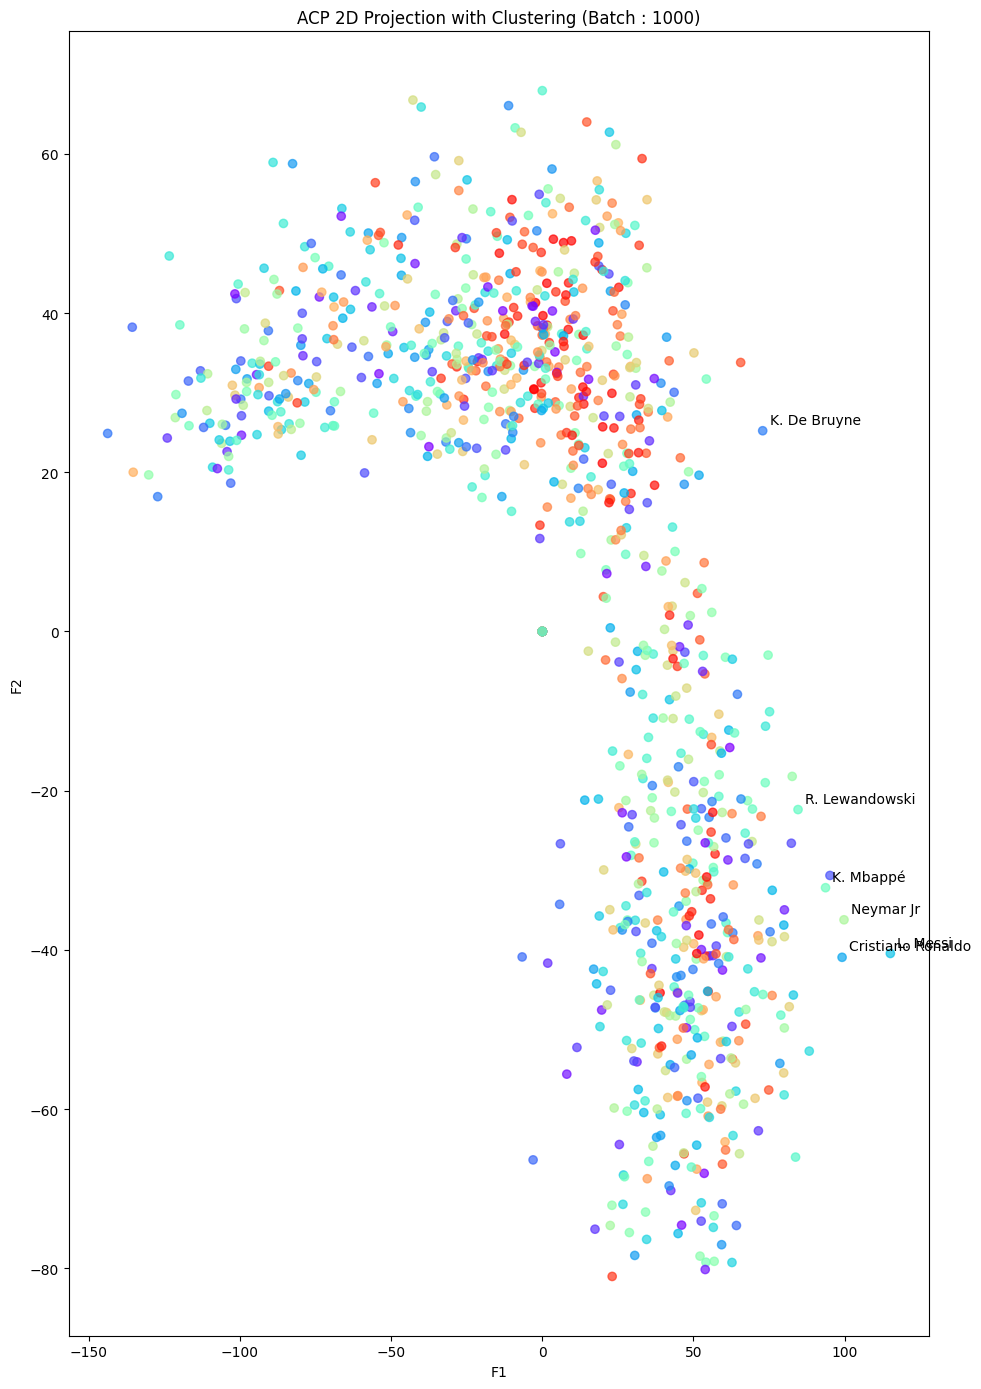

In [7]:
# 1.1 Sélectionner les 1000 meilleurs joueurs de champs (pas gardien). Réaliser un traitement "online" afin de réaliser un clustering et une PCA 2D par lot de 200 joueurs. Pour chaque itération, afficher la projection 2D de tous les joueurs traités.

import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA

NB_GRAPH = 6

def best_players2D(batch_size, n_cluster) :
    df_players = df[df['Position2'] != 'Gardien']
    df_players = df_players.sort_values(by='overall', ascending=False)[:batch_size]

    batch_size = batch_size
    n_components = batch_size // 100

    kmeans = MiniBatchKMeans(n_cluster, batch_size=batch_size)

    pca = IncrementalPCA(n_components)

    for y in range(0, len(df_players), batch_size):
        batch = df_players.iloc[y:y+batch_size]

        features = batch[skills_ratings].values
        features = np.nan_to_num(features, nan=0)

        kmeans.partial_fit(features)
        labels = kmeans.predict(features)
        batch['cluster'] = labels

        pca.partial_fit(features)
        transformed = pca.transform(features)

        transformed = np.where(transformed < -150, 0 , transformed)

        batch['pca1'] = transformed[:, 0]
        batch['pca2'] = transformed[:, 1]

        fig, ax = plt.subplots(figsize=(10,14))

        top_players = batch[batch['overall'] > 90]
        for index, player in top_players.iterrows():
            ax.annotate(player['short_name'], (player['pca1'], player['pca2']),
                         fontsize=10, color='black',
                         xytext=(5, 5),
                         textcoords='offset points')

        plt.scatter(batch['pca1'], batch['pca2'], c=batch['cluster'], cmap='rainbow', alpha=0.7)
        plt.title('ACP 2D Projection with Clustering (Batch : ' + str(batch_size) + ')'.format(y//batch_size +1))
        plt.xlabel('F1')
        plt.ylabel('F2')

for i in range(1, NB_GRAPH) :
    best_players2D(200 * i, 200 * i)

plt.tight_layout()
plt.show()



cc


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'Axes' object has no attribute 'set_zlabel'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


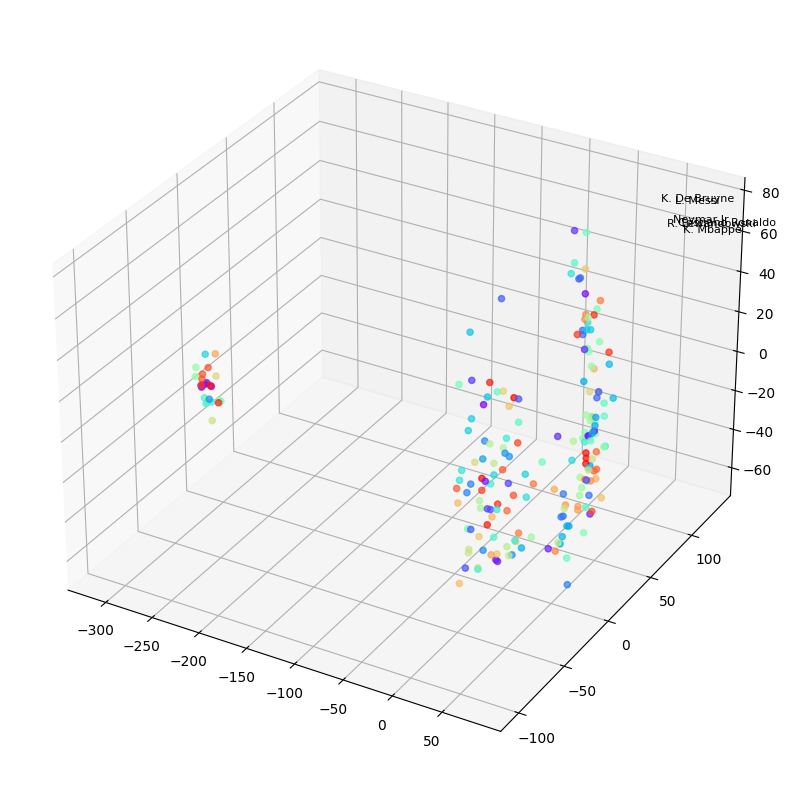

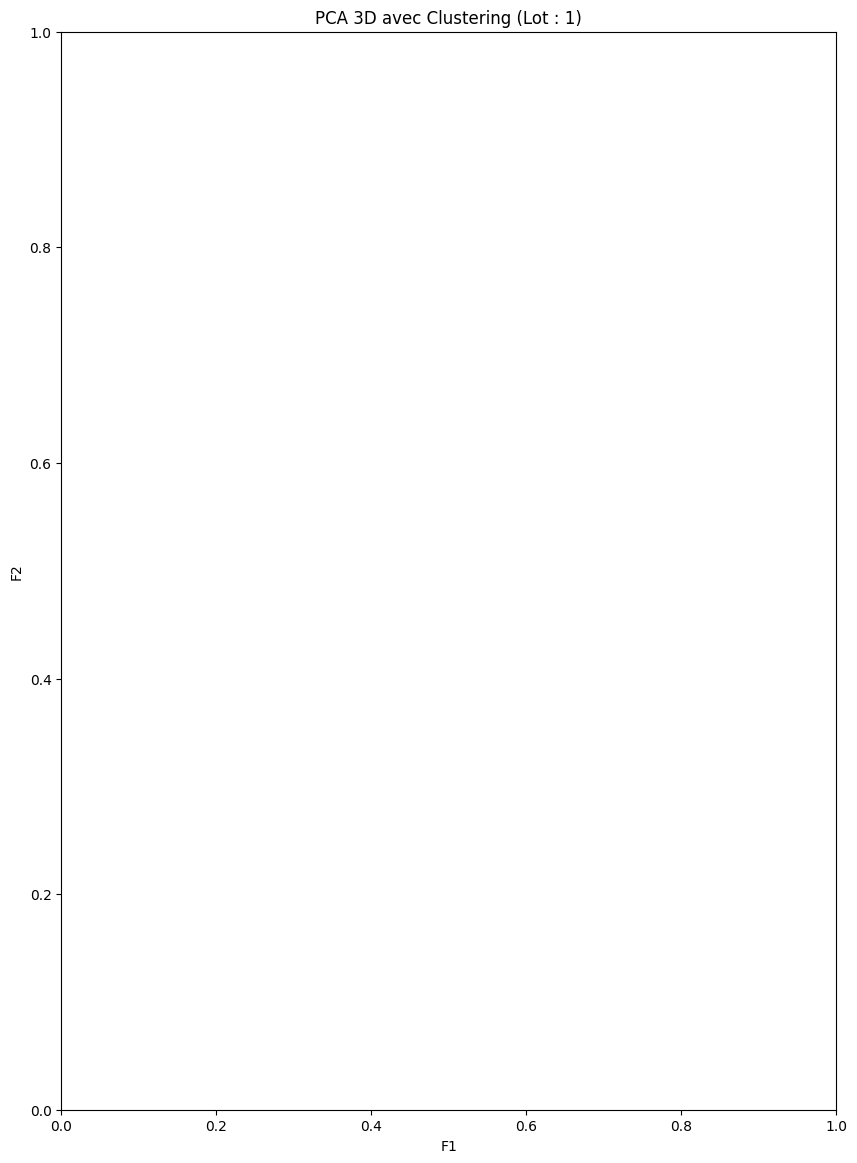

In [15]:
NB_GRAPH = 6

def best_players3D(batch_size, n_cluster) :
    print("cc")
    df_players = df[df['Position2'] != 'Gardien']
    df_players = df_players.sort_values(by='overall', ascending=False)[:batch_size]

    batch_size = batch_size

    pca = IncrementalPCA(n_components = 3)
    kmeans = MiniBatchKMeans(n_cluster, batch_size=batch_size)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    for z in range(1, NB_GRAPH):
        # sélectionner les joueurs pour le lot courant
        start = (z-1) * batch_size
        end = z * batch_size
        df_players = df[start:end]

        # extraire les features pour la PCA et le clustering
        features = df_players[skills_ratings].values
        features = np.nan_to_num(features, nan=0)

        pca.partial_fit(features)
        transformed = pca.transform(features)

        kmeans.partial_fit(transformed)
        labels = kmeans.predict(transformed)

        ax.scatter3D(transformed[:, 0], transformed[:, 1], transformed[:, 2], c=labels, cmap='rainbow', alpha=0.7)

        top_players = df_players[df_players['overall'] > 90]
        for index, player in top_players.iterrows():
            ax.text(player['pace'], player['shooting'], player['passing'], player['short_name'], fontsize=8, color='black')
        fig, ax = plt.subplots(figsize=(10,14))

        ax.set_title('PCA 3D avec Clustering (Lot : {})'.format(z))
        ax.set_xlabel('F1')
        ax.set_ylabel('F2')
        ax.set_zlabel('F3')

for i in range(1, NB_GRAPH) :
    best_players3D(200 * i, 156)

plt.tight_layout()
plt.show()
